In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import cpt

In [2]:
p11, p22, p33 = 0.5, 0.5, 0 #density matrix values
p12, p13, p23 = 0, 0, 0
P0 = np.array([p11, p22, p12, p13, p23], dtype='complex')

In [3]:
w1=cpt.get_w1(1)
w2=cpt.get_w2(1)

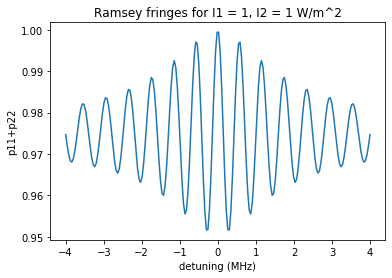

In [4]:
(detuning, ptot) = cpt.ramsey_resonance(10e-6, 10e-6, 0.3e-6, P0, 1, 1, 4e6, n=200)
plt.xlabel('detuning (MHz)')
plt.ylabel('p11+p22')
plt.title('Ramsey fringes for I1 = 1, I2 = 1 W/m^2')
plt.plot(detuning*1e-6, ptot.real)

In [5]:
# save detuning numbers to file
filename="p11+p22,I1=1,I2=1.csv"
with open(filename, "a") as datafile:
    writer = csv.writer(datafile)
    writer.writerow(['detuning (MHz)', 'p11+p22'])
    for i in range(len(detuning)):
        writer.writerow([detuning[i]*1e-6, ptot[i].real])

In [2]:
filename2="p11+p22,I1=1,I2=1.csv"
d='detuning (MHz)'
p='p11+p22'

df = pd.read_csv(filename2)


In [18]:
# find fringe signal amplitude

n=len(df)
starti=int(n*3/8)
stopi=int(n*5/8)
df2 = df.loc[starti : stopi]  # choose center section of plot
n2=len(df2)
minp=maxp=0.97
mini=maxi=0
for i in range(starti , stopi):
    if (df2[p][i] < minp):
        minp = df2[p][i]
        mini = i
    elif (df2[p][i] > maxp):
        maxp = df2[p][i]
        maxi = i

S=maxp-minp
print(maxi)
print(mini)

99
92


In [21]:
# find fwhm and height (B)

leftmini=rightmini=0
prev=maxp
for i in range(maxi-1, starti, -1):
    if (df2[p][i] > prev):
        leftmini = i+1
        break
    prev = df2[p][i]

prev=maxp
for i in range(maxi+1, stopi):
    if (df2[p][i] > prev):
        rightmini = i-1
        break
    prev = df2[p][i]
    
B=(df2[p][leftmini] + df2[p][midi])/2

l = int((leftmini+maxi) / 2)
r = int((rightmini+maxi) / 2)
fwhm = df2[d][r] - df2[d][l]
fwhm

0.32160804020100503

In [22]:
contrast=S/B
contrast

0.0488849967057056

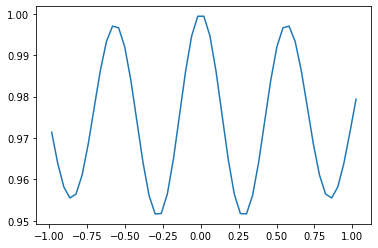

In [22]:
plt.plot(df2[d], df2[p])